# 📊 **Automated Detection of Chronic Kidney Disease (CKD)**  
### 🔬 Using CNN-BiLSTM for Accurate and Early Diagnosis  
---

> **Authors**: Yasir Hussein Shakir  
> **Affiliation**: College of Graduate Studies (COGS), Universiti Tenaga Nasional (UNITEIN), Kajang, Malaysia  
> **Date**: 12-20-2024

---
Compute ROC curve and AUC for each class
💡 *"Early diagnosis can save lives—our proposed system leverages advanced machine learning models to assist in CKD classification."*

*"Chronic Kidney Disease (CKD) can result from various factors, including tumors, cysts, and kidney stones. Tumors have the potential to cause significant harm to essential organs, while kidney stones develop from solid deposits in the digestive tract. Early and precise diagnosis is crucial to prevent damage to glands, spinal cells, and other vital organs. This paper introduces an automated system for CKD detection utilizing a CNN-BiLSTM model. The CNN component extracts deep features from CT images, while the BiLSTM leverages its temporal sequence learning capabilities, employing four optimizers: Adam, Adamax, SGD, and RMSprop. During implementation, the proposed system achieved a test accuracy, precision, recall, and F1 score of 99.84% using the Adam optimizer. Experimental results demonstrate the system's potential to assist doctors in diagnosing CKD accurately and determining appropriate treatments to reduce patient mortality rates. Although the current dataset has validated the system's effectiveness, incorporating a larger and more diverse dataset in the future could enhance its performance. This research signifies a promising step toward advancing automated CKD diagnosis."*


---

### Table of Contents:
1. Import library
2. Dataset path and parameters
3. Normalize and one-hot encode
4. Split the dataset
5. CNN with BiLSTM model
6. Train the model
7. Evaluate the model
8. Evaluate the model on the test data
9. Compute ROC curve and AUC for each class
10. Load and preprocess the image to testing model





💾 **Dataset Used**:  
[CT Kidney Dataset - Normal, Cyst, Tumor, and Stone](https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone)

### 📫 **How to Contact Me**:
- **Kaggle**: [Yasir Hussein](https://www.kaggle.com/yasserhessein)  
- **GitHub**: [Yasir Hussein](https://github.com/yasserhessein)  
- **LinkedIn**: [Yasir Hussein](https://www.linkedin.com/in/yasir-hussein-314a65201/)  
- **Email**: [yasserhesseinshakir@yahoo.com](mailto:yasserhesseinshakir@yahoo.com) 

In [1]:
#Import library
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Bidirectional, LSTM, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Reshape
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
print("Done")

Done


In [2]:
# Dataset path and parameters
dataset_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
img_size = 150
batch_size = 64
classes = ['Normal', 'Cyst', 'Tumor', 'Stone']

# Load and preprocess the dataset
def load_data(dataset_path, classes):
    data = []
    labels = []
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))
                data.append(img)
                labels.append(i)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(data), np.array(labels)

data, labels = load_data(dataset_path, classes)

In [3]:
# Normalize and one-hot encode
data = data / 255.0
labels = to_categorical(labels, num_classes=len(classes))
#labels

In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# CNN with BiLSTM model
input_layer = Input(shape=(img_size img_size, 3))

# CNN Layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = GlobalAveragePooling2D()(x)  # Convert feature maps to 1D vector

# Reshape for BiLSTM
x = Reshape((1, -1))(x)  # Reshape to (batch_size, timesteps=1, features)

# BiLSTM Layer
x = Bidirectional(LSTM(128, return_sequences=False))(x)

# Fully Connected Layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(classes), activation='softmax')

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

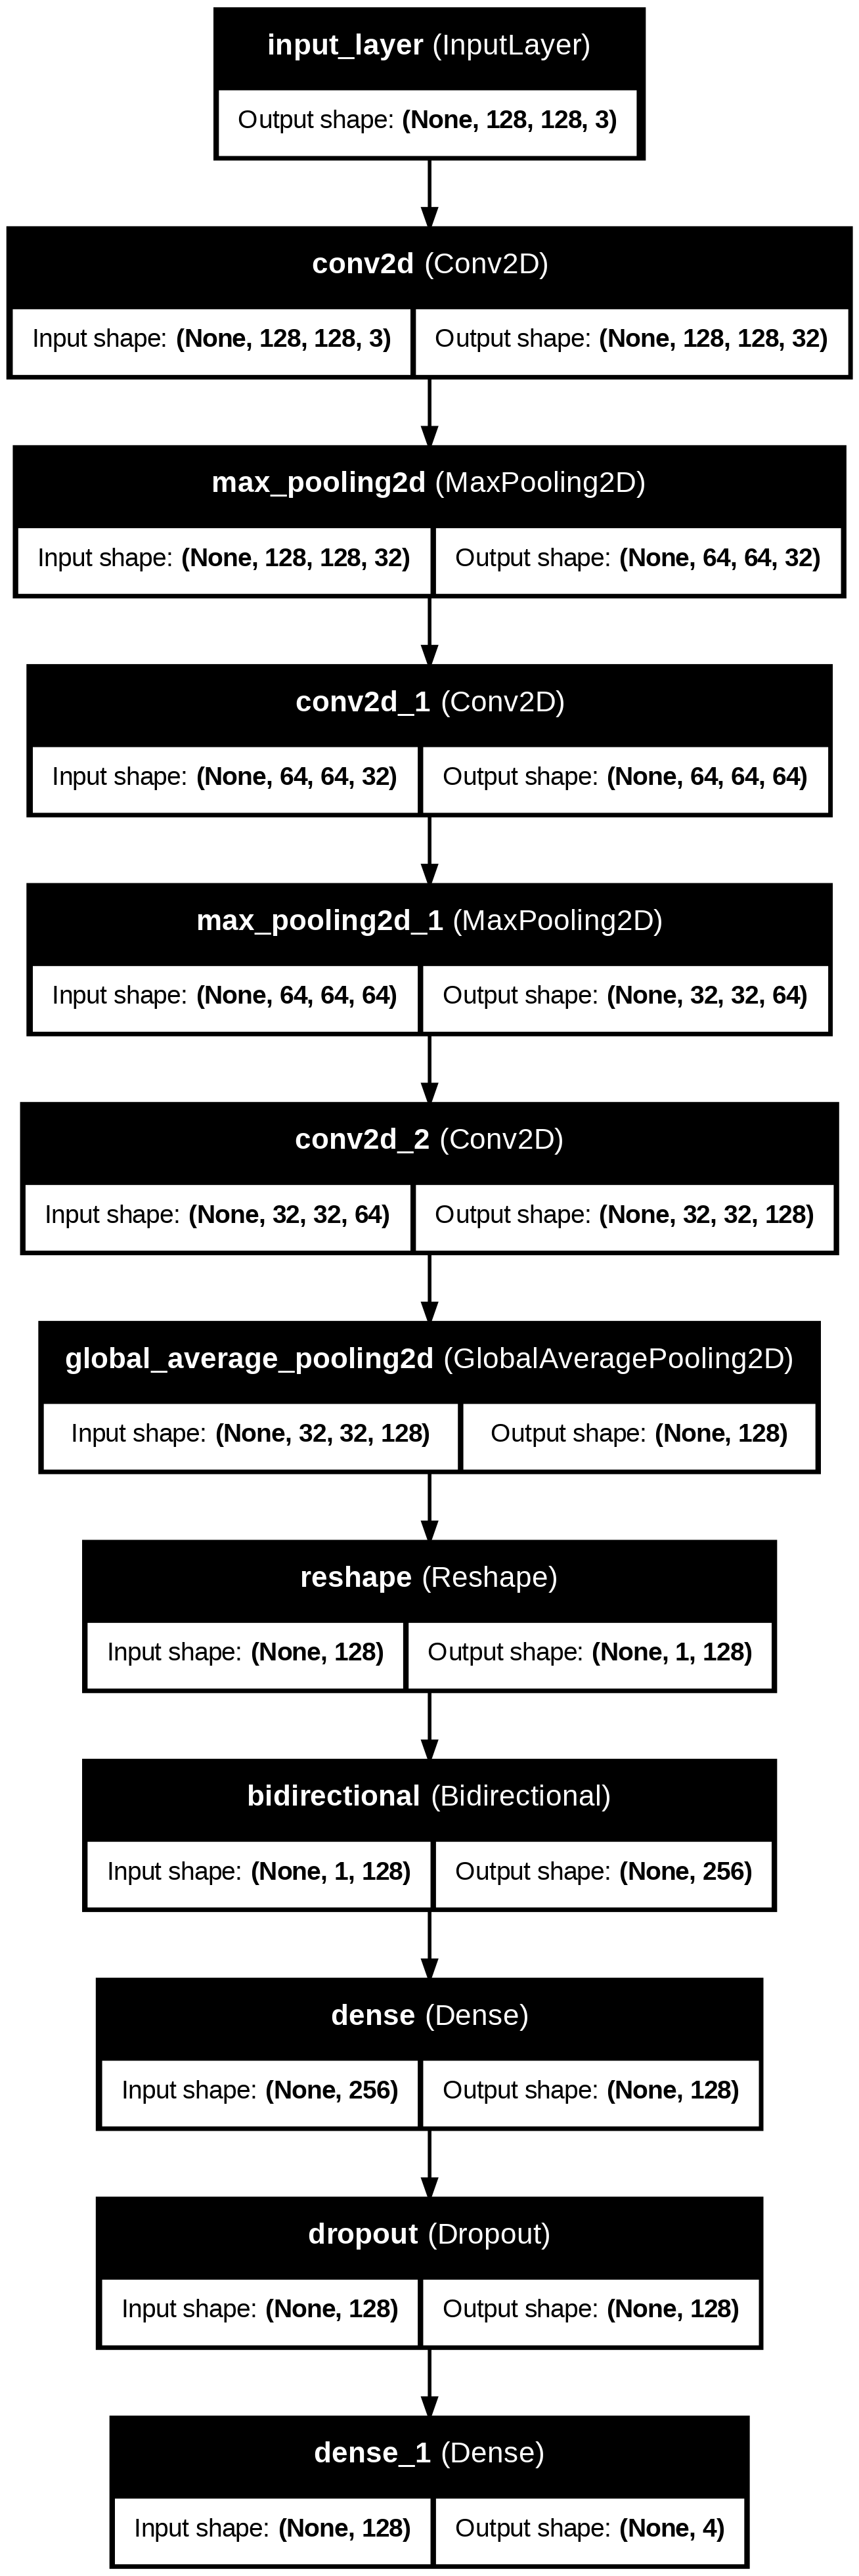

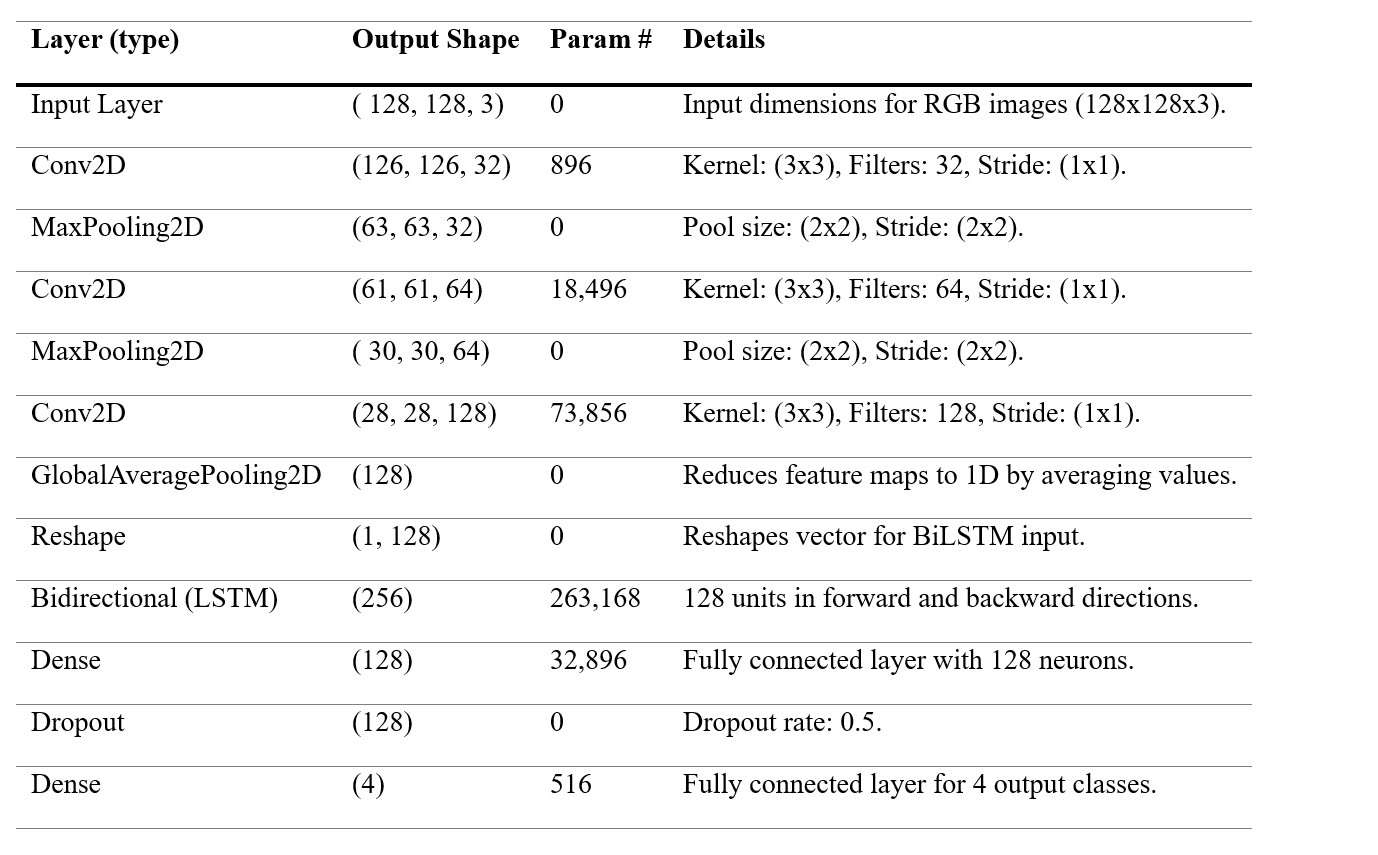

In [6]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=80,
    verbose=1
)

Epoch 1/80
140/140 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.4490 - loss: 1.2400 - val_accuracy: 0.6055 - val_loss: 1.0110
Epoch 2/80
140/140 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.6233 - loss: 0.9986 - val_accuracy: 0.6631 - val_loss: 0.9182
Epoch 3/80
140/140 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.6707 - loss: 0.8963 - val_accuracy: 0.6894 - val_loss: 0.8661
Epoch 4/80
140/140 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.6687 - loss: 0.8955 - val_accuracy: 0.6939 - val_loss: 0.8051
Epoch 5/80
140/140 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.6953 - loss: 0.8233 - val_accuracy: 0.7269 - val_loss: 0.7456
Epoch 6/80
140/140 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.7111 - loss: 0.7890 - val_accuracy: 0.7412 - val_loss: 0.7156
Epoch 7/80
140/140 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7118 - loss: 0.7608 - val_accuracy: 0.7282 - val_loss: 0.7007
Epoch 8/80
140/140 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.7302 - loss: 0.6888 - val_accu

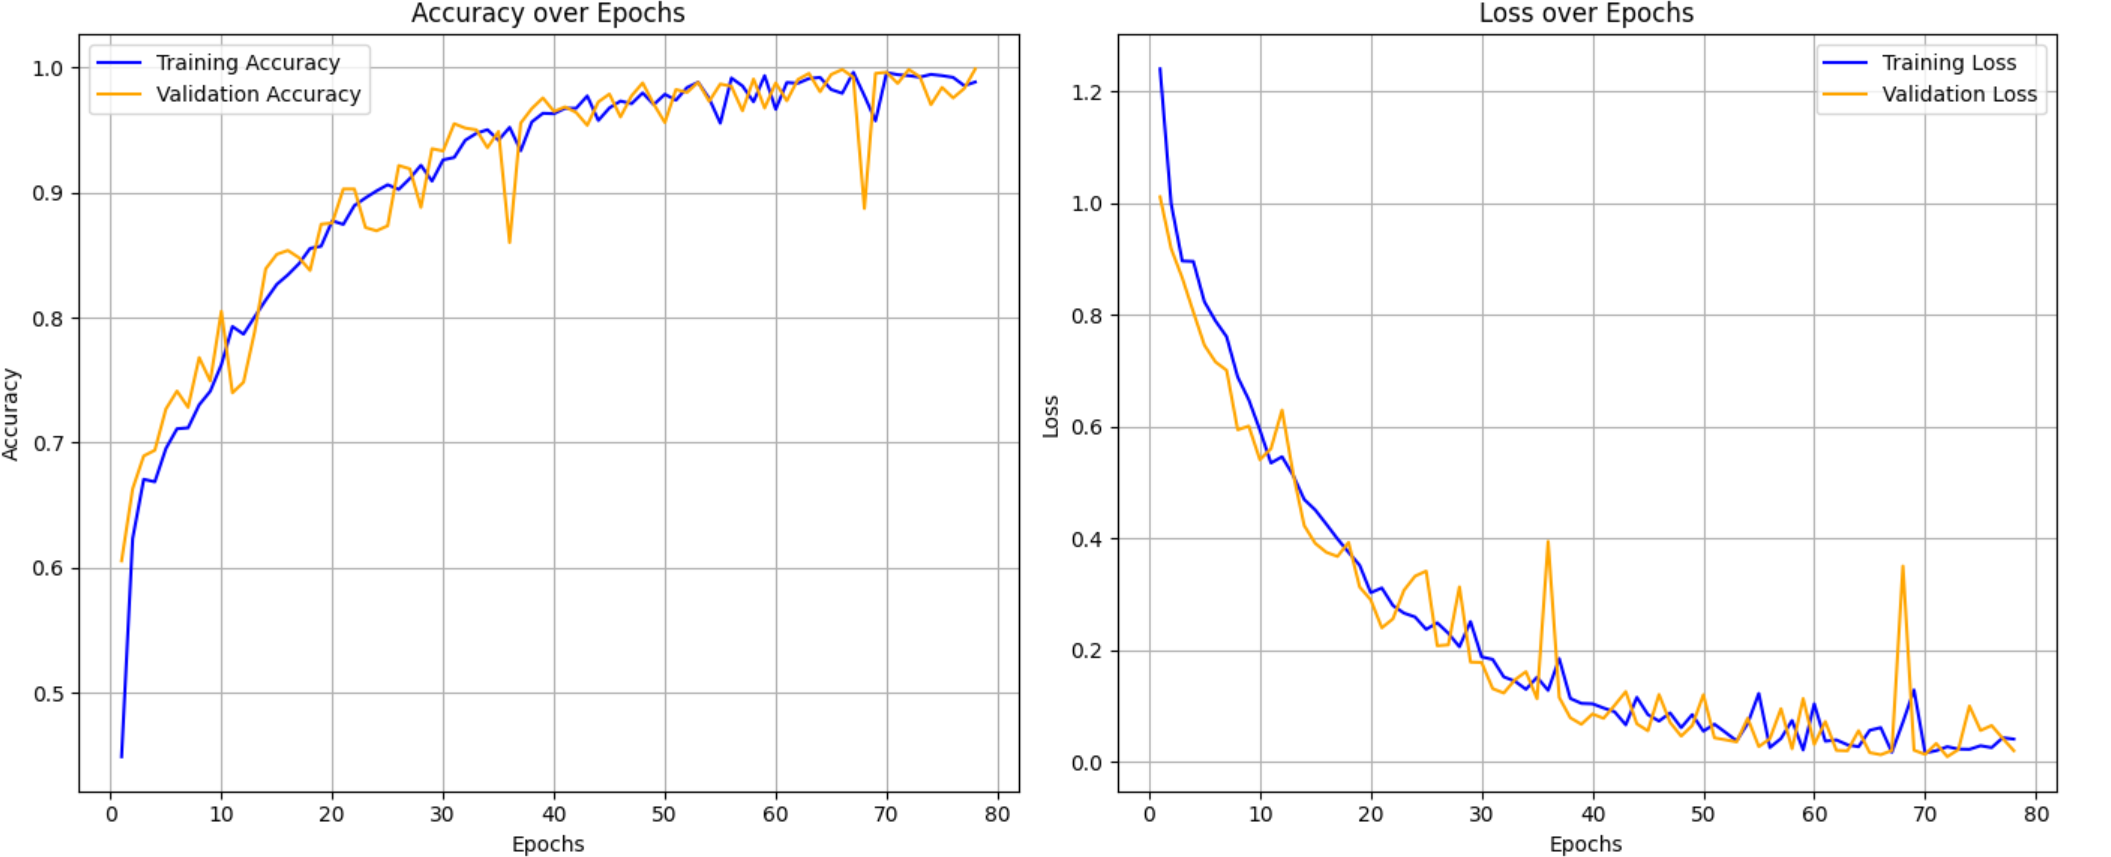

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('cnn_bilstm_kidney_classification.h5')

39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.9988 - loss: 0.0057
Test Accuracy: 99.84%


Test Accuracy: 99.84%

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       526
        Cyst       1.00      1.00      1.00       373
       Tumor       1.00      1.00      1.00       236
       Stone       1.00      0.99      1.00       110

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245

Precision: 0.9984%
Recall: 0.9984%
F1 Score: 0.9984%

Confusion Matrix:
[[526   0   0   0]
 [  0 373   0   0]
 [  1   0 235   0]
 [  1   0   0 109]]


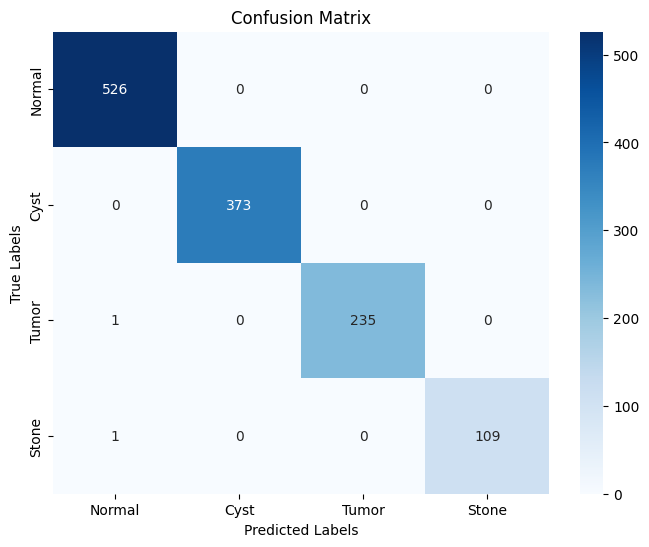

In [8]:
# Evaluate the model on the test data
from sklearn.metrics import precision_score, recall_score, f1_score
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict on the test set
y_pred = model.predict(X_test, verbose=0)

# Convert predictions and true labels to categorical format
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes
y_true_classes = np.argmax(y_test, axis=1)  # True classes

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))


# Calculate precision, recall, F1 score, and confusion matrix
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')


# Print the results
print(f"Precision: {precision:.4f}%")
print(f"Recall: {recall:.4f}%")
print(f"F1 Score: {f1:.4f}%")


conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
# Define class names
classes = ['Normal', 'Cyst', 'Tumor', 'Stone']


# Binarize the labels for multi-class (One-vs-Rest)
n_classes = y_test.shape[1]  # Assuming y_test is one-hot encoded
y_test_binarized = label_binarize(np.argmax(y_test, axis=1), classes=range(n_classes))
y_pred_probs = model.predict(X_test) 


# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple']  # Add more colors if needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()


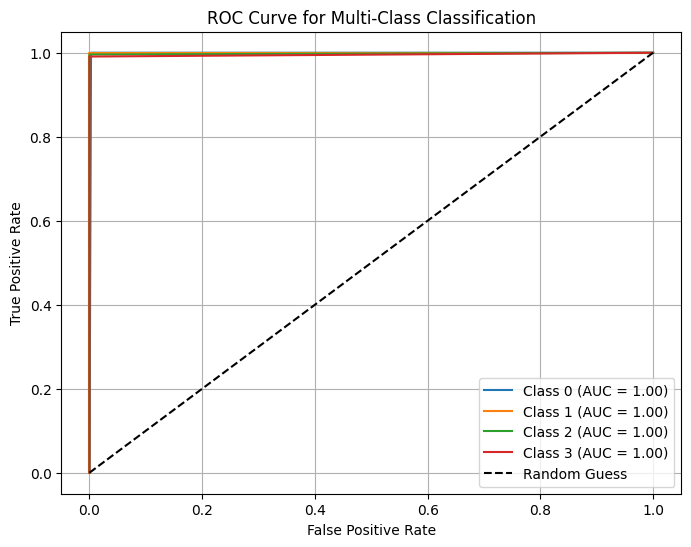

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


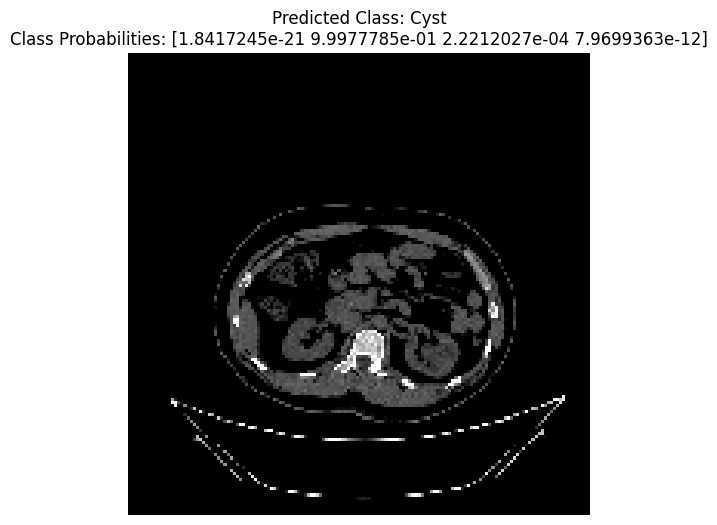

Predicted class: Cyst
Class probabilities: [1.8417245e-21 9.9977785e-01 2.2212027e-04 7.9699363e-12]


In [10]:
# Load and preprocess the image
image_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1009).jpg'

# Load the image with target size same as the input size of the model
img = load_img(image_path, target_size=(img_size, img_size))
img_array = img_to_array(img)  # Convert to numpy array
img_array = img_array / 255.0  # Normalize the image (same as during training)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Get the index of the highest probability

# Map the predicted index to the class name
predicted_class_name = classes[predicted_class]

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.title(f"Predicted Class: {predicted_class_name}\nClass Probabilities: {predictions[0]}")
plt.show()

# Print the result
print(f"Predicted class: {predicted_class_name}")
print(f"Class probabilities: {predictions[0]}")